In [1]:
import os
import torch
import numpy as np

import scanpy as sc
from anndata import AnnData
import anndata as ad

result_dir = "../edges/"
raw_type=False
use_edge=False

In [2]:
import matplotlib.pyplot as plt
# Set global font sizes using rcParams
plt.rcParams.update({
    'font.size': 18,            # Global font size
    'axes.titlesize': 20,       # Font size of the axes title
    'axes.labelsize': 20,       # Font size of the x and y labels
    'xtick.labelsize': 16,      # Font size of the x-tick labels
    'ytick.labelsize': 16,      # Font size of the y-tick labels
    'legend.fontsize': 18,      # Font size of the legend
    'figure.titlesize': 24      # Font size of the figure title
})

In [3]:
#samples=['H20.33.001.CX28.MTG.02.007.1.02.02', 'H20.33.001.CX28.MTG.02.007.1.02.03', 'H20.33.001.Cx28.MTG.02.007.1.01.03', 'H20.33.004.Cx26.MTG.02.007.1.01.04', 'H20.33.004.Cx26.MTG.02.007.1.01.05', 'H20.33.004.Cx26.MTG.02.007.1.02.02', 'H20.33.004.Cx26.MTG.02.007.1.02.03', 'H20.33.004.Cx26.MTG.02.007.1.02.04', 'H20.33.012.Cx24.MTG.02.007.1.01.01', 'H20.33.012.Cx24.MTG.02.007.1.03.02', 'H20.33.012.Cx24.MTG.02.007.1.03.03', 'H20.33.015.CX24.MTG.02.007.1.03.01', 'H20.33.015.CX24.MTG.02.007.1.03.02', 'H20.33.015.Cx24.MTG.02.007.1.03.03', 'H20.33.025.Cx28.MTG.02.007.1.01.02', 'H20.33.025.Cx28.MTG.02.007.1.01.04', 'H20.33.025.Cx28.MTG.02.007.1.01.06', 'H20.33.035.Cx26.MTG.02.007.1.01.03', 'H20.33.035.Cx26.MTG.02.007.1.01.04', 'H20.33.040.Cx25.MTG.02.007.1.01.03', 'H20.33.040.Cx25.MTG.02.007.1.01.04', 'H20.33.044.Cx26.MTG.02.007.1.01.02', 'H20.33.044.Cx26.MTG.02.007.1.01.03', 'H20.33.044.Cx26.MTG.02.007.1.01.04', 'H21.33.001.Cx22.MTG.02.007.1.01.03', 'H21.33.001.Cx22.MTG.02.007.1.01.04', 'H21.33.005.Cx18.MTG.02.007.02.03', 'H21.33.005.Cx18.MTG.02.007.02.04', 'H21.33.006.Cx28.MTG.02.007.1.01.09.02', 'H21.33.006.Cx28.MTG.02.007.1.01.09.03', 'H21.33.006.Cx28.MTG.02.007.1.01.09.04', 'H21.33.011.Cx26.MTG.02.007.3.01.04', 'H21.33.011.Cx26.MTG.02.007.3.01.05', 'H21.33.011.Cx26.MTG.02.007.3.01.06', 'H21.33.012.Cx26.MTG.02.007.1.01.04', 'H21.33.012.Cx26.MTG.02.007.1.01.05', 'H21.33.012.Cx26.MTG.02.007.1.01.06', 'H21.33.013.Cx24.MTG.02.007.1.06', 'H21.33.014.CX26.MTG.02.007.1.02.02', 'H21.33.015.Cx26.MTG.02.007.1.0', 'H21.33.015.Cx26.MTG.02.007.1.1', 'H21.33.015.Cx26.MTG.02.007.1.2', 'H21.33.016.Cx26.MTG.02.007.3.01.01', 'H21.33.016.Cx26.MTG.02.007.3.01.02', 'H21.33.016.Cx26.MTG.02.007.3.01.03', 'H21.33.019.Cx30.MTG.02.007.5.0', 'H21.33.019.Cx30.MTG.02.007.5.01.01', 'H21.33.019.Cx30.MTG.02.007.5.01.02', 'H21.33.021.Cx26.MTG.02.007.1.04', 'H21.33.021.Cx26.MTG.02.007.1.06', 'H21.33.022.Cx26.MTG.02.007.2.M.02', 'H21.33.022.Cx26.MTG.02.007.2.M.03', 'H21.33.022.Cx26.MTG.02.007.2.M.04', 'H21.33.023.Cx26.MTG.02.007.1.03.01', 'H21.33.023.Cx26.MTG.02.007.1.03.04', 'H21.33.023.Cx26.MTG.02.007.1.03.05', 'H21.33.025.CX26.MTG.02.007.4.01.02', 'H21.33.025.CX26.MTG.02.007.4.01.04', 'H21.33.025.CX26.MTG.02.007.4.01.06', 'H21.33.028.CX28.MTG.02.007.1.01.01', 'H21.33.028.Cx28.MTG.02.007.1.02.02', 'H21.33.028.Cx28.MTG.02.007.1.02.04', 'H21.33.031.CX24.MTG.02.007.1.01.01', 'H21.33.031.CX24.MTG.02.007.1.01.02', 'H21.33.032.CX24.MTG.02.007.1.01.04', 'H21.33.038.Cx20.MTG.02.007.3.01.02', 'H21.33.038.Cx20.MTG.02.007.3.01.04', 'H21.33.040.Cx22.MTG.02.007.3.03.01', 'H21.33.040.Cx22.MTG.02.007.3.03.03', 'H21.33.040.Cx22.MTG.02.007.3.03.04']
sample='Lung6'
data_dir = "../../data/NSCLC/processed1/"
str_position_x="CenterX_global_px"
str_position_y="CenterY_global_px"
str_cell_type="CellType"
cell_types=['B-cell', 'NK', 'T CD4 memory', 'T CD4 naive', 'T CD8 memory', 'T CD8 naive', 'Treg', 'endothelial', 'epithelial', 'fibroblast', 'mDC', 'macrophage', 'mast', 'monocyte', 'neutrophil', 'pDC', 'plasmablast', 'tumor 12', 'tumor 13', 'tumor 5', 'tumor 6', 'tumor 9']

genes = torch.load("/".join(data_dir.split("/")[:-2]) + "/genes.pth")
type_exp_dict=np.load(data_dir + sample + "_TypeExp.npz", allow_pickle=True)

tensor([-0.0210, -0.0077, -0.0023,  0.0004,  0.0014,  0.0017,  0.0017,  0.0015,
         0.0014,  0.0012,  0.0011,  0.0010,  0.0009,  0.0008,  0.0007,  0.0007,
         0.0006,  0.0006,  0.0006,  0.0005,  0.0005,  0.0005,  0.0005,  0.0005,
         0.0005,  0.0005,  0.0005,  0.0005,  0.0005,  0.0005,  0.0004,  0.0004,
         0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,
         0.0005,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0005,
         0.0005])
loss: tensor(0.0768)
random: tensor(0.0924)
first 5: tensor(0.0848)
first 10: tensor(0.0802)
first 20: tensor(0.0780)
first 30: tensor(0.0772)
first 40: tensor(0.0769)
first 50: tensor(0.0768)
torch.Size([89091, 49]) tensor([[0.0235, 0.0183, 0.0069,  ..., 0.0016, 0.0008, 0.0010],
        [0.0376, 0.0107, 0.0039,  ..., 0.0018, 0.0007, 0.0012],
        [0.0442, 0.0242, 0.0098,  ..., 0.0009, 0.0007, 0.0008],
        ...,
        [0.0237, 0.0074, 0.0039,  ..., 0.0036, 0.0009, 0.0033],
        [0.0382,

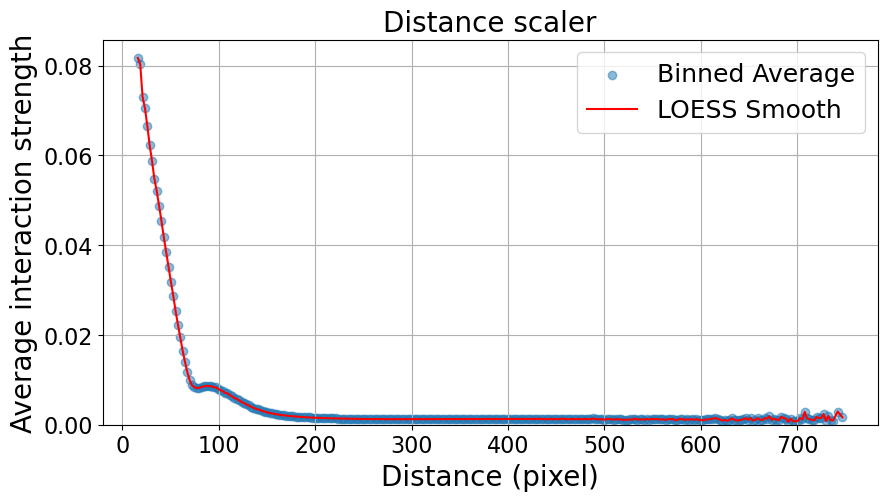

In [4]:
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_binned_average_with_loess(x, y, bins=300, frac=0.013):
    # Bin data and compute average y for each bin
    bin_means, bin_edges, binnumber = binned_statistic(x, y, statistic='mean', bins=bins)
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = bin_edges[:-1] + bin_width / 2

    # Calculate the smooth curve using Lowess
    lowess = sm.nonparametric.lowess
    smoothed_data = lowess(bin_means, bin_centers, frac=frac)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.scatter(bin_centers, bin_means, alpha=0.5, label='Binned Average')
    plt.plot(smoothed_data[:, 0], smoothed_data[:, 1], 'r-', label='LOESS Smooth')
    plt.title("Distance scaler")
    plt.xlabel("Distance (pixel)")
    plt.ylabel("Average interaction strength")
    if np.min(y)>=0:
        plt.ylim(bottom=0)  # Set the y-axis to start from 0
    plt.legend()
    plt.grid(True)
    plt.savefig("./figures/distance_scaler.pdf", bbox_inches='tight')
    plt.show()

def plot_distance_info(sample,gene="all",use_rank=False,cumsum=False,cumsum_proportion=False,use_y_pred=False,filter_small=False):
    results=torch.load(result_dir+"edges_"+sample+".pth",map_location=torch.device('cpu'))
    attention_scores=results["attention_score"]/8
    
    print(torch.mean(attention_scores[:,:,86],dim=0))
    print("loss:",torch.mean(torch.square(results["y_pred"]-results["y"])))
    print("random:",torch.mean(torch.square(results["y"])))
    print("first 5:",torch.mean(torch.square(torch.sum(attention_scores[:,:5,:],dim=1)-results["y"])))
    print("first 10:",torch.mean(torch.square(torch.sum(attention_scores[:,:10,:],dim=1)-results["y"])))
    print("first 20:",torch.mean(torch.square(torch.sum(attention_scores[:,:20,:],dim=1)-results["y"])))
    print("first 30:",torch.mean(torch.square(torch.sum(attention_scores[:,:30,:],dim=1)-results["y"])))
    print("first 40:",torch.mean(torch.square(torch.sum(attention_scores[:,:40,:],dim=1)-results["y"])))
    print("first 50:",torch.mean(torch.square(torch.sum(attention_scores,dim=1)-results["y"])))

    proportion=torch.abs(attention_scores)
    
    if filter_small:
        tmp=proportion/torch.sum(proportion,dim=1,keepdim=True)
        proportion[tmp<0.02]=0

    #print(torch.mean(torch.abs(attention_scores)))
    #proportion=proportion/torch.sum(proportion,dim=1,keepdim=True)
    
    if gene=="all":
        proportion=torch.mean(proportion,dim=-1)
    else:
        proportion=proportion[:,:,genes.index(gene)]

    if cumsum:
        proportion=np.cumsum(proportion,axis=-1)

    if cumsum_proportion:
        cumsum_y=np.cumsum(attention_scores,axis=-2)
        if use_y_pred:
            y=results["y_pred"]
        else:
            y=results["y"]
        print(torch.mean(torch.square(results["y"]-results["y_pred"])))
        y=y.unsqueeze(dim=1)
        y=y.numpy()
        proportion=cumsum_y/y/8
        if gene=="all":
            proportion=torch.mean(proportion,dim=-1)
        else:
            proportion=proportion[:,:,genes.index(gene)]
    
    print(proportion.shape,proportion,torch.sum(proportion,dim=1))

    position_xs=results["position_x"][:,1:]
    position_ys=results["position_y"][:,1:]
    position_x0=results["position_x"][:,0:1]
    position_y0=results["position_y"][:,0:1]
    distances=torch.sqrt(torch.square(position_xs-position_x0)+torch.square(position_ys-position_y0))

    proportion=proportion.flatten().numpy()
    distance=distances.flatten().numpy()

    if use_rank:
        n=attention_scores.shape[1]
        tmp=np.arange(n)+1
        distance=np.tile(tmp, (attention_scores.shape[0], 1)).flatten()
    
    print(distance.shape,proportion.shape)
    plot_binned_average_with_loess(distance,proportion)

plot_distance_info(sample) 

tensor([-0.0210, -0.0077, -0.0023,  0.0004,  0.0014,  0.0017,  0.0017,  0.0015,
         0.0014,  0.0012,  0.0011,  0.0010,  0.0009,  0.0008,  0.0007,  0.0007,
         0.0006,  0.0006,  0.0006,  0.0005,  0.0005,  0.0005,  0.0005,  0.0005,
         0.0005,  0.0005,  0.0005,  0.0005,  0.0005,  0.0005,  0.0004,  0.0004,
         0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,
         0.0005,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0004,  0.0005,
         0.0005])
loss: tensor(0.0768)
random: tensor(0.0924)
first 5: tensor(0.0848)
first 10: tensor(0.0802)
first 20: tensor(0.0780)
first 30: tensor(0.0772)
first 40: tensor(0.0769)
first 50: tensor(0.0768)
torch.Size([89091, 49]) tensor([[0.0026, 0.0251, 0.0238,  ..., 0.0006, 0.0008, 0.0029],
        [0.0364, 0.0036, 0.0043,  ..., 0.0048, 0.0005, 0.0016],
        [0.0404, 0.0330, 0.0089,  ..., 0.0017, 0.0011, 0.0011],
        ...,
        [0.3923, 0.1251, 0.0432,  ..., 0.0139, 0.0112, 0.0127],
        [0.0081,

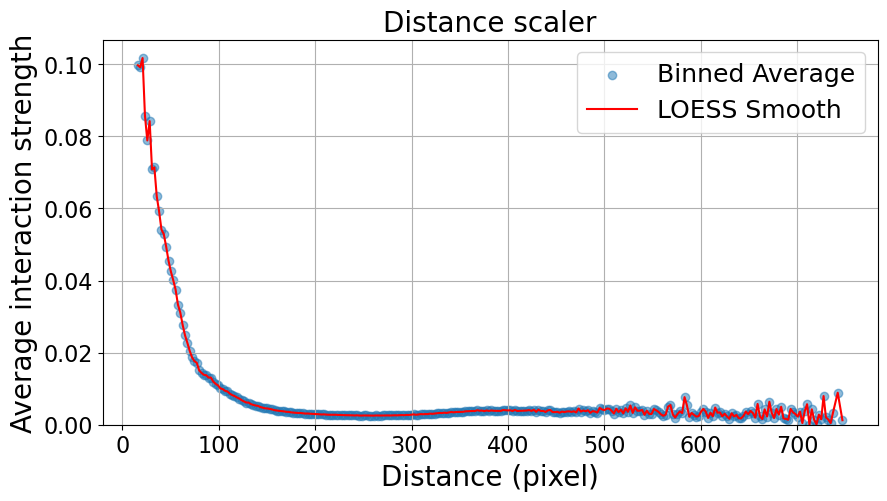

In [5]:
plot_distance_info(sample,"SPP1") 

torch.Size([89091, 49]) tensor([[0.1616, 0.1165, 0.0457,  ..., 0.0097, 0.0057, 0.0079],
        [0.2455, 0.0570, 0.0236,  ..., 0.0128, 0.0050, 0.0088],
        [0.2752, 0.1392, 0.0489,  ..., 0.0069, 0.0049, 0.0053],
        ...,
        [0.1942, 0.0606, 0.0323,  ..., 0.0310, 0.0064, 0.0280],
        [0.1766, 0.1809, 0.0831,  ..., 0.0045, 0.0049, 0.0095],
        [0.2194, 0.0969, 0.0489,  ..., 0.0114, 0.0204, 0.0051]]) tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000])
(4365459,) (4365459,)


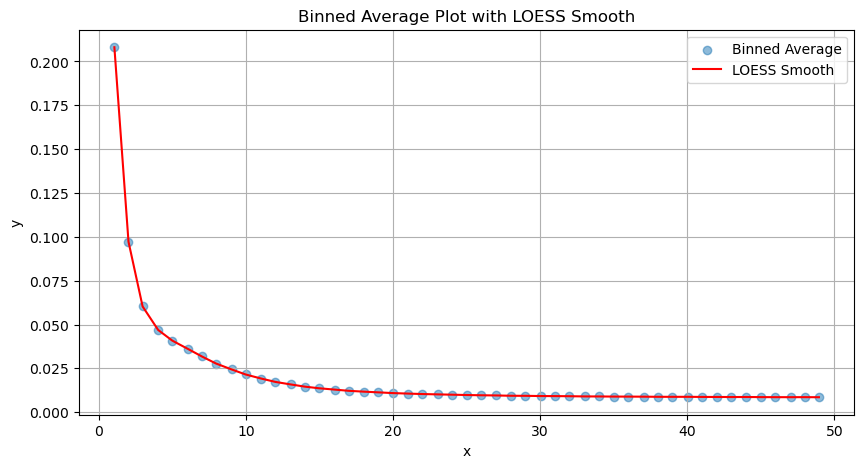

In [5]:
plot_distance_info(sample,use_rank=True) 

torch.Size([89091, 49]) tensor([[0.1616, 0.2781, 0.3238,  ..., 0.9864, 0.9921, 1.0000],
        [0.2455, 0.3025, 0.3261,  ..., 0.9863, 0.9912, 1.0000],
        [0.2752, 0.4144, 0.4633,  ..., 0.9898, 0.9947, 1.0000],
        ...,
        [0.1942, 0.2548, 0.2871,  ..., 0.9656, 0.9720, 1.0000],
        [0.1766, 0.3575, 0.4406,  ..., 0.9856, 0.9905, 1.0000],
        [0.2194, 0.3163, 0.3652,  ..., 0.9745, 0.9949, 1.0000]]) tensor([35.7498, 35.9952, 38.7853,  ..., 30.4196, 38.3825, 33.7296])
(4365459,) (4365459,)


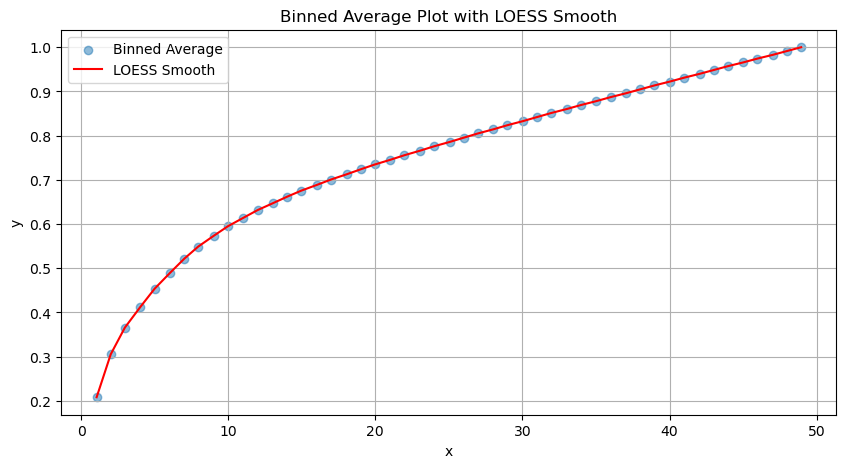

In [6]:
plot_distance_info(sample,use_rank=True,cumsum=True) 

torch.Size([89091, 49]) tensor([[0.2203, 0.3781, 0.4366,  ..., 0.9981, 0.9982, 1.0000],
        [0.3423, 0.4165, 0.4427,  ..., 0.9972, 0.9972, 1.0000],
        [0.3833, 0.5751, 0.6381,  ..., 0.9996, 0.9999, 1.0000],
        ...,
        [0.2700, 0.3521, 0.3927,  ..., 0.9666, 0.9670, 1.0000],
        [0.2384, 0.4830, 0.5929,  ..., 0.9962, 0.9962, 1.0000],
        [0.3039, 0.4378, 0.5039,  ..., 0.9789, 0.9999, 1.0000]]) tensor([40.4965, 41.1254, 44.6672,  ..., 32.8805, 43.5733, 37.6222])
(4365459,) (4365459,)


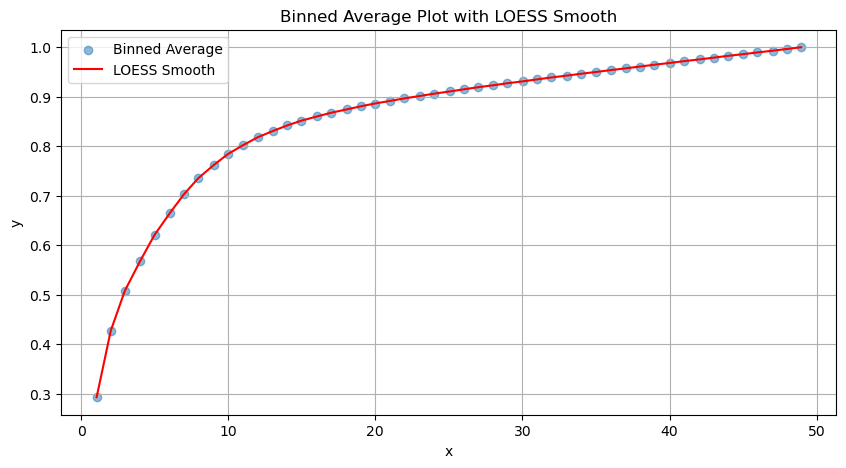

In [7]:
plot_distance_info(sample,use_rank=True,cumsum=True,filter_small=True) 

tensor(0.0768)
torch.Size([89091, 49]) tensor([[ 0.0282,  0.3029,  0.0426,  ..., -0.2097, -0.2188, -0.2503],
        [-0.0605, -0.0664, -0.0735,  ..., -0.0836, -0.0827, -0.0800],
        [ 0.4427,  0.8037,  0.9007,  ...,  0.4251,  0.4128,  0.4003],
        ...,
        [ 0.5806,  0.7658,  0.7019,  ...,  2.0886,  2.1051,  2.0863],
        [ 0.0882,  0.5948,  0.6303,  ..., -0.3419, -0.3362, -0.3417],
        [ 2.8320,  2.3759,  2.8803,  ...,  6.7353,  6.7649,  6.8207]]) tensor([ -6.0188,  -3.0248,  35.7924,  ...,  82.7384,  -9.6324, 272.3901])
(4365459,) (4365459,)


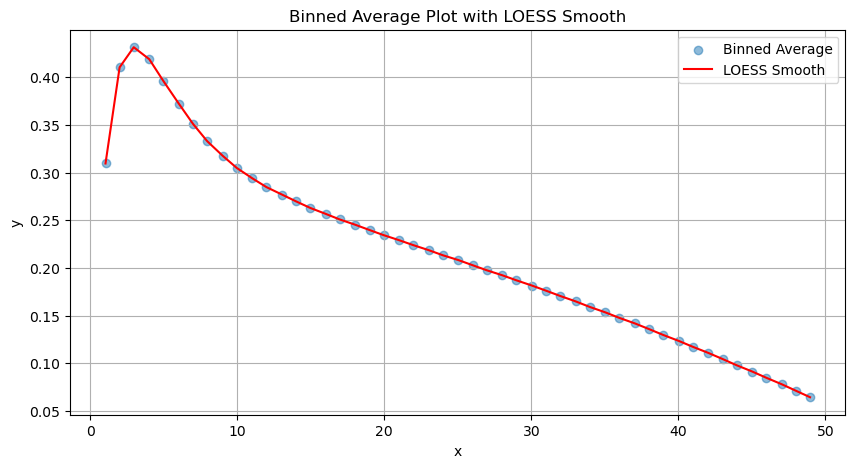

In [8]:
plot_distance_info(sample,use_rank=True,cumsum_proportion=True,gene="SPP1")

tensor(0.0768)
torch.Size([89091, 49]) tensor([[ 0.4721,  0.9197,  0.9870,  ...,  0.9968,  1.0137,  1.0000],
        [-1.5916, -0.8897, -0.9482,  ...,  1.0211,  1.0484,  1.0000],
        [ 0.2685,  0.2464,  0.3200,  ...,  1.0200,  1.0186,  1.0000],
        ...,
        [-1.3141, -1.5960, -1.5107,  ...,  1.1144,  1.1410,  1.0000],
        [ 0.2829,  0.4392,  0.7110,  ...,  0.9786,  0.9726,  1.0000],
        [ 0.5150,  0.5331,  0.6003,  ...,  0.8911,  0.9993,  1.0000]]) tensor([ 45.3072,  41.6396,  44.8853,  ..., -10.9423,  52.8661,  36.5956])
(4365459,) (4365459,)


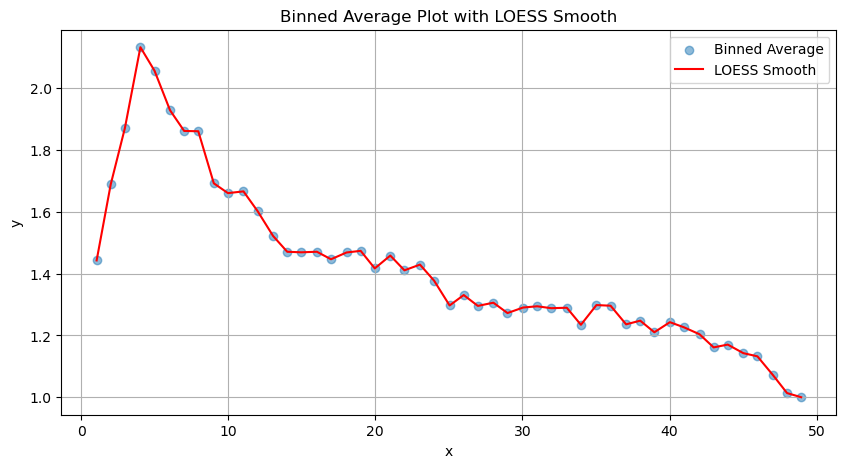

In [9]:
plot_distance_info(sample,use_rank=True,cumsum_proportion=True,use_y_pred=True)

tensor(0.0768)
torch.Size([89091, 49]) tensor([[-0.1128, -1.2101, -0.1701,  ...,  0.8379,  0.8740,  1.0000],
        [ 0.7557,  0.8300,  0.9188,  ...,  1.0445,  1.0338,  1.0000],
        [ 1.1059,  2.0078,  2.2501,  ...,  1.0620,  1.0312,  1.0000],
        ...,
        [ 0.2783,  0.3670,  0.3364,  ...,  1.0011,  1.0090,  1.0000],
        [-0.2580, -1.7408, -1.8447,  ...,  1.0006,  0.9838,  1.0000],
        [ 0.4152,  0.3483,  0.4223,  ...,  0.9875,  0.9918,  1.0000]]) tensor([24.0486, 37.8054, 89.4113,  ..., 39.6573, 28.1904, 39.9361])
(4365459,) (4365459,)


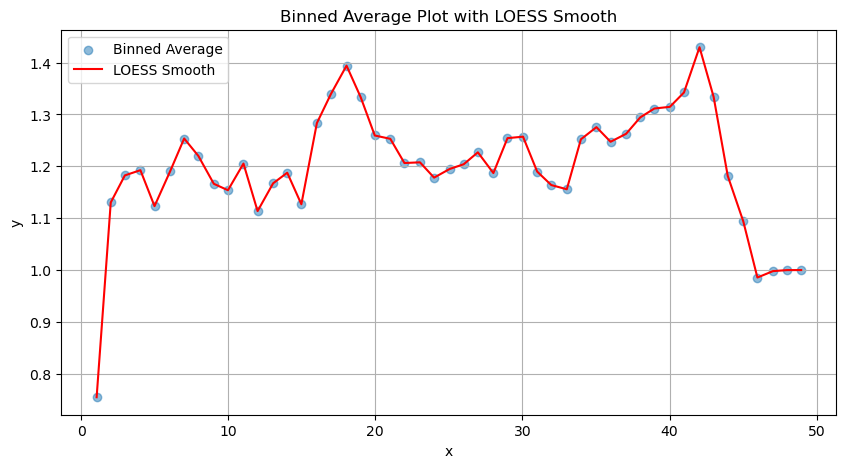

In [10]:
plot_distance_info(sample,use_rank=True,cumsum_proportion=True,use_y_pred=True,gene="SPP1")

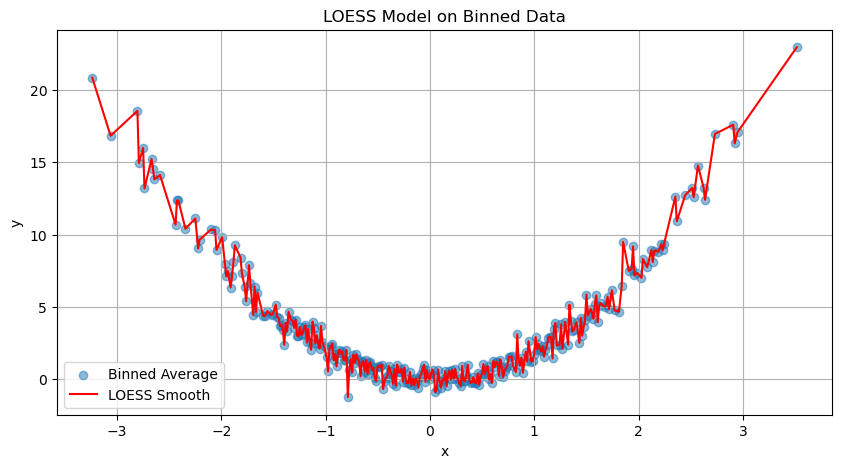

TypeError: 'function' object is not subscriptable

In [11]:
from scipy.stats import binned_statistic
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def prepare_loess_model(x, y, bins=500, frac=0.013):
    # Bin data and compute average y for each bin
    bin_means, bin_edges, binnumber = binned_statistic(x, y, statistic='mean', bins=bins)
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = bin_edges[:-1] + bin_width / 2

    # Calculate the smooth curve using Lowess
    lowess = sm.nonparametric.lowess
    smoothed_data = lowess(bin_means, bin_centers, frac=frac)
    
    # Plotting for visualization
    plt.figure(figsize=(10, 5))
    plt.scatter(bin_centers, bin_means, alpha=0.5, label='Binned Average')
    plt.plot(smoothed_data[:, 0], smoothed_data[:, 1], 'r-', label='LOESS Smooth')
    plt.title("LOESS Model on Binned Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return the fitted LOESS model for prediction
    return lowess

def predict_with_loess_model(loess_model, new_x):
    # Predict using the fitted LOESS model
    # Find the nearest points and perform linear interpolation
    x_values = loess_model[:, 0]
    y_values = loess_model[:, 1]
    if new_x < x_values[0] or new_x > x_values[-1]:
        raise ValueError("New x value is out of the bounds of the x values in the model.")
    else:
        return np.interp(new_x, x_values, y_values)

# Example usage
x = np.random.normal(0, 1, 1000)
y = 2 * x**2 + np.random.normal(0, 1, 1000)

# Prepare the model
loess_model = prepare_loess_model(x, y)

# Predict for a new x value
new_x = 0.5
predicted_y = predict_with_loess_model(loess_model, new_x)
print(f"The predicted y value for x = {new_x} is {predicted_y}")
